# Imports

In [1]:
import networkx
import matplotlib.pyplot as plt
import utils
import random
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()

# Graph generator

In [2]:
nx = networkx.newman_watts_strogatz_graph(150,2, 0.3, seed=None)

# Show Graph

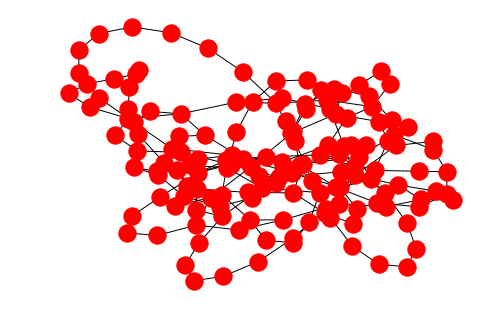

In [3]:
networkx.draw(nx)
plt.show()

In [4]:
g = utils.nx2Graph(nx)

In [6]:
nr_samples = 4000
g = utils.nx2Graph(nx)
X,y = utils.BuildDatatasetRNN(g,nr_samples)
X
    

[[3, 1],
 [42, 21],
 [62, 38],
 [63, 76],
 [90, 114],
 [122, 138],
 [1, 64],
 [12, 132],
 [136, 37],
 [13, 48],
 [60, 138],
 [28, 138],
 [1, 125],
 [129, 79],
 [135, 71],
 [132, 147],
 [95, 103],
 [135, 61],
 [10, 76],
 [17, 110],
 [27, 54],
 [112, 66],
 [15, 82],
 [92, 72],
 [50, 99],
 [37, 1],
 [5, 97],
 [68, 22],
 [34, 129],
 [53, 28],
 [149, 29],
 [62, 39],
 [89, 91],
 [109, 149],
 [29, 36],
 [41, 107],
 [60, 94],
 [35, 26],
 [112, 95],
 [99, 102],
 [107, 122],
 [73, 14],
 [125, 53],
 [61, 30],
 [19, 61],
 [75, 14],
 [110, 132],
 [121, 77],
 [55, 127],
 [16, 30],
 [101, 22],
 [15, 37],
 [10, 117],
 [83, 75],
 [110, 119],
 [5, 63],
 [58, 39],
 [41, 145],
 [86, 10],
 [116, 53],
 [14, 41],
 [93, 10],
 [29, 7],
 [63, 10],
 [18, 29],
 [7, 93],
 [63, 87],
 [36, 60],
 [64, 71],
 [129, 94],
 [62, 87],
 [13, 90],
 [46, 61],
 [99, 12],
 [106, 29],
 [9, 67],
 [57, 111],
 [35, 55],
 [66, 13],
 [93, 112],
 [106, 69],
 [100, 55],
 [7, 3],
 [111, 70],
 [123, 87],
 [96, 106],
 [32, 76],
 [94, 114]

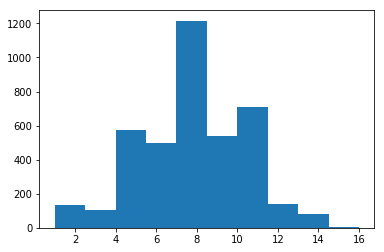

In [9]:
plt.hist([len(path) for path in y])
plt.show()

In [10]:
y

[[140, 141, 17, 29, 116],
 [138, 137, 136, 135, 43, 44, 37],
 [90, 61, 62, 63, 64, 65, 66],
 [42, 43, 44, 37, 36, 35, 34, 25],
 [127, 137, 136, 140],
 [140, 141, 17, 29, 116, 115, 114],
 [3, 4, 5, 6, 7, 35],
 [103, 102, 121, 122, 123, 124, 125],
 [85, 84, 83, 2, 3, 49, 26, 25, 24],
 [71, 70, 31, 30, 29, 17, 141, 142, 143],
 [132, 131, 32, 33, 34, 35, 7],
 [119, 120, 121, 102, 96, 97, 98],
 [18, 17, 29, 52],
 [29, 28, 27, 26, 25, 11],
 [137, 128, 129, 130, 131, 32, 33, 34, 10],
 [125, 124, 123, 122, 42, 41, 40, 83, 52, 6, 7],
 [147, 148, 149, 1, 2],
 [7, 6, 52, 29, 116, 117, 118, 119, 120],
 [67, 55, 54, 53, 52, 29, 28, 27, 26],
 [104, 105, 106, 36, 37, 44, 45, 46],
 [70, 31, 30, 29, 52, 6],
 [59, 58, 57, 56, 85, 84, 83, 40, 39, 18, 134],
 [32, 131, 132, 133, 134, 135, 43],
 [15, 16, 17, 29, 52, 83, 2, 3],
 [-1],
 [81, 82, 83, 40, 39, 38, 37, 44],
 [142, 41, 42, 122, 121, 102, 96, 95],
 [135, 134, 18, 17, 29, 30, 31, 70, 71],
 [84, 83, 40, 39, 38],
 [54, 53, 52, 83, 40, 41, 42, 43],
 [3